#### Student performance indicator

Life cycle of machine learning project

1. Understanding the problem statement
2. Data collection
3. Data checks to perform
4. Exploratory data analysis
5. Data pre-processing
6. model training
7. Choose best model

### 1) Problem Statement

#####    This project understands how the student's performance(test scores) is affected by other variables such as Gender, Ethnicity, Parental level of eductaion, Lunch, Test preparation course.

### 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows

2.1 Import Data and Required Packages

Importing few libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

Checking Missing Values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Checking Duplicate values

In [7]:
df.duplicated().sum()

0

Checking Data types

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight

1) from above description of numerical data, all means are very close to each other - between 66 and 68.05;
2) All standard deviations are also close between 14.6 and 15.19;
3) While there is minimum score 0 for math, for writing minimum is much higher = 10 and for reading min is 17

### 3.7 Exploring Data

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
print("Categories in 'gender' variable:  ", end="")
print(df['gender'].unique())

print("\nCategories in 'race_ethnicity' variable:  ", end="")
print(df['race_ethnicity'].unique())

print("\nCategories in 'parental level of education' variable:  ", end="")
print(df['parental_level_of_education'].unique())

print("\nCategories in 'lunch' variable:  ", end="")
print(df['lunch'].unique())

Categories in 'gender' variable:  ['female' 'male']

Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:  ['standard' 'free/reduced']


In [13]:
# Define numerical and categorical columns

numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

# print columns
print('we have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nwe have {} catgorical features : {}'.format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 catgorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
# check head of the dataframe
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [15]:
## Adding columns for ''Total Score' and 'Average'

df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average'] = df['Total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
# Number of students with full marks in the corresponding subjects (math, reading, writing)

reading_full = df[df['reading_score'] == 100]['Average'].count()
writing_full = df[df['writing_score'] == 100]['Average'].count()
math_full = df[df['math_score'] == 100]['Average'].count()

print(f'Number of students with full marks in Reading:  {reading_full}')
print(f'Number of students with full marks in Writing:  {writing_full}')
print(f'Numebr of students with full marks in math:  {math_full}')

Number of students with full marks in Reading:  17
Number of students with full marks in Writing:  14
Numebr of students with full marks in math:  7


In [17]:
# Number of students with <20 marks in the corresponding subjects (math, reading, writing)

reading_less_20 = df[df['reading_score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average'].count()
math_less_20 = df[df['math_score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Math: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


### Insights

1) From the above values we get students performed worst in Math subject
2) The best performance of students was in Reading 

### Exploring Data (Visualization) --> Histogram, kernel Distribution Function (KDE)



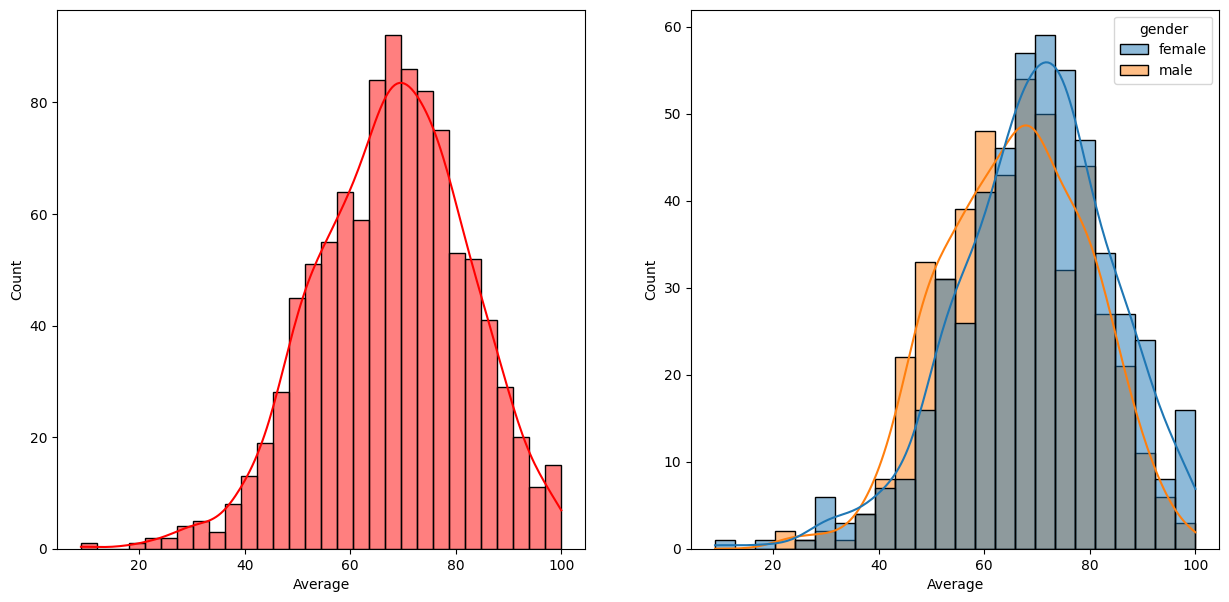

In [18]:
## Histogram & KDE

fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Average',kde=True,hue='gender')
plt.show()

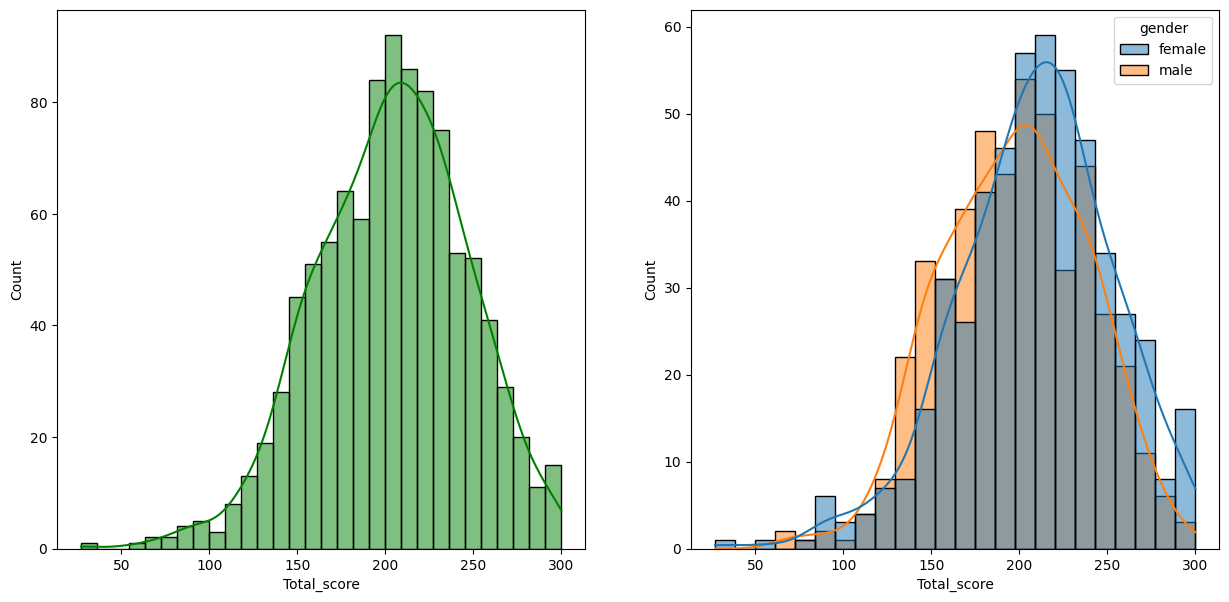

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

### Insights
Female students tends to perform better than male students

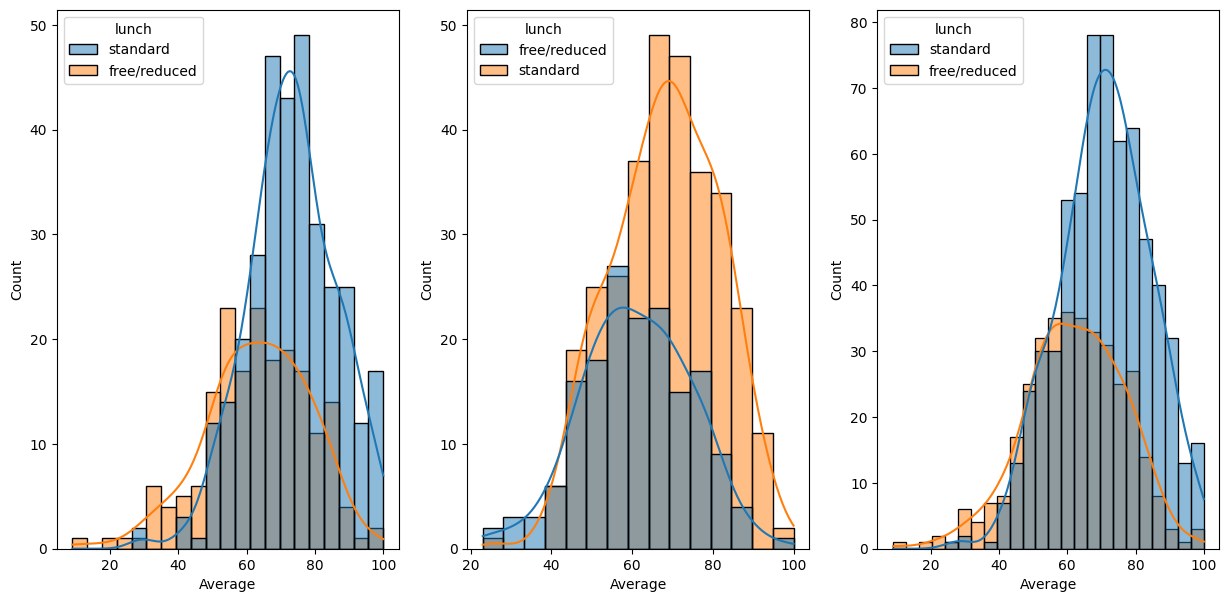

In [20]:
plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df[df['gender'] == 'female'], x='Average', kde=True, hue='lunch' )
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='Average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.show()

### Insights
Standard lunch help students perform well in class

Standard lunch help students perform well in class regardless of their gender

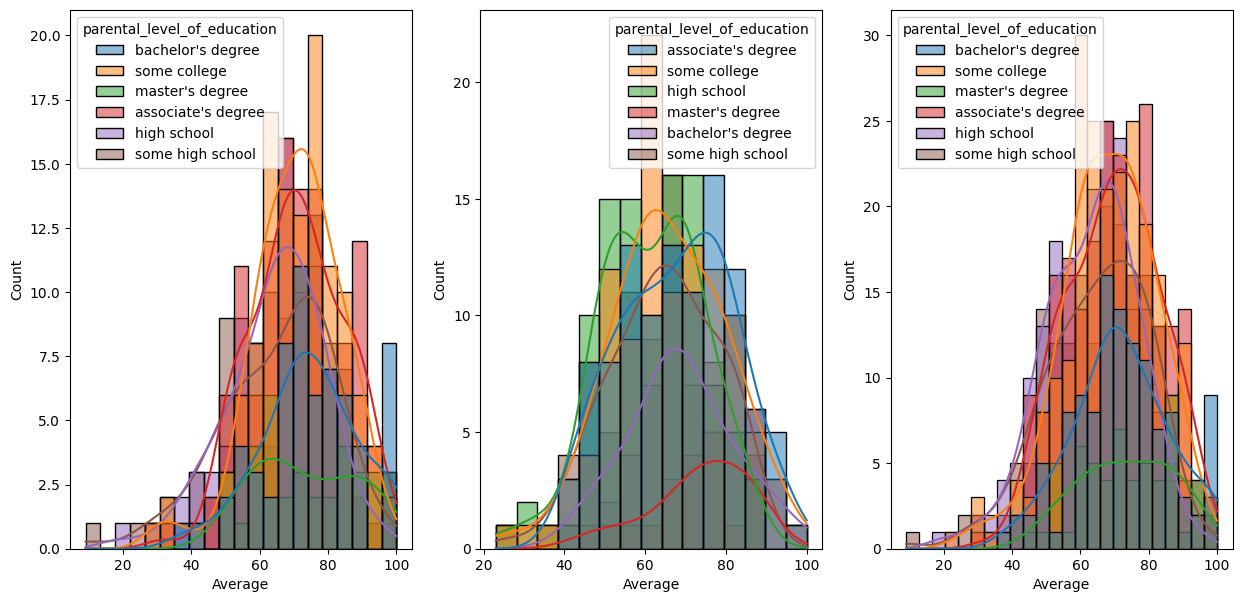

In [21]:
plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df[df['gender'] == 'female'], x='Average', kde=True, hue='parental_level_of_education' )
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'male'], x='Average', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education')
plt.show()

### Insights
3rd plot: In general parent's education does not help students perform well in class

2nd plot shows that parent's who's education is of associate's degree or master's degree their male child tend to perform well in exam.

1st plot we can see that there is no effect of parent's eduction on female students.

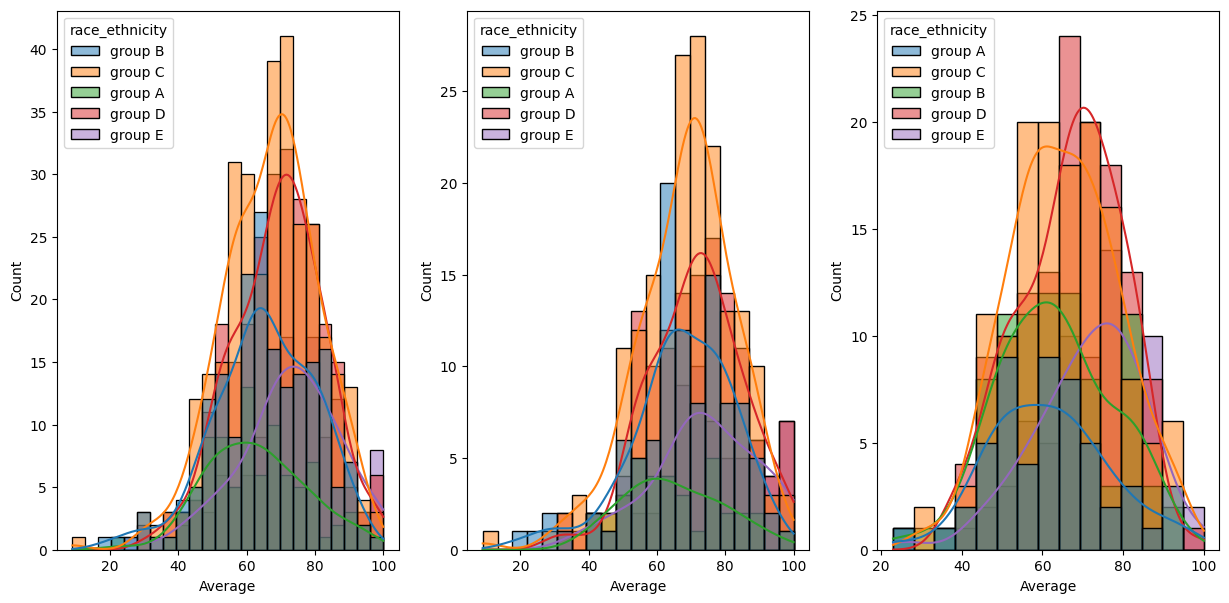

In [22]:
plt.subplots(1, 3, figsize=(15,7))
plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df['gender'] == 'female'], x='Average', kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df['gender'] == 'male'], x='Average', kde=True, hue='race_ethnicity')
plt.show()

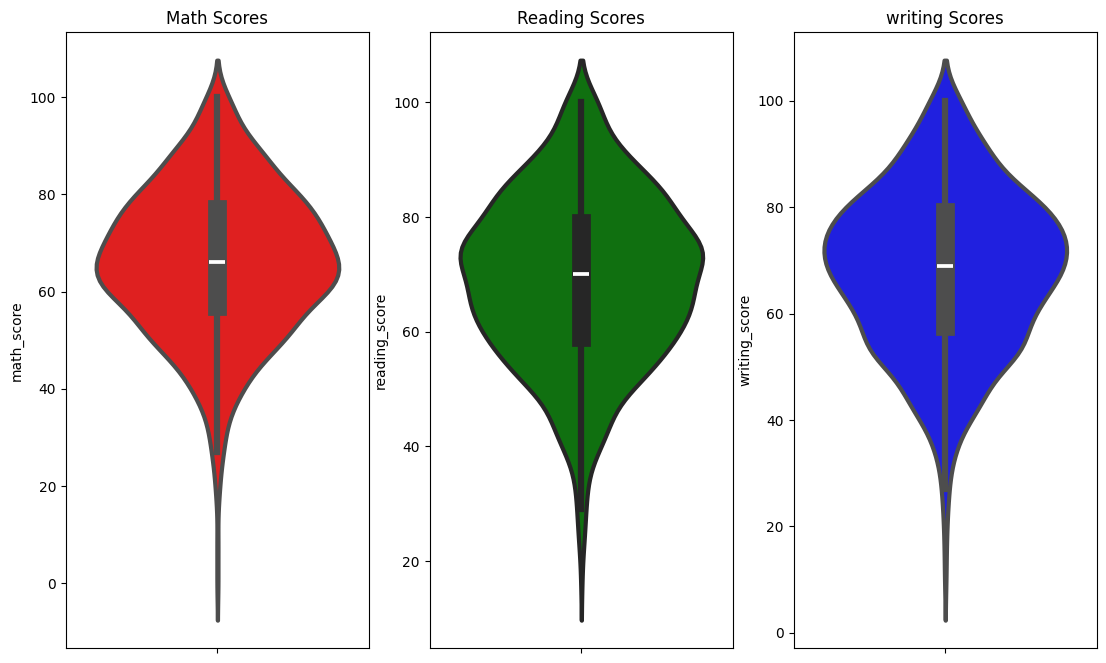

In [23]:
## Maximum score of students in all three subjects

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing Scores')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()

### Insights
From the above three plots it clearly shows that most of the students scores between 50-80 in maths whereas in reading and writing most of them scored between 60-80

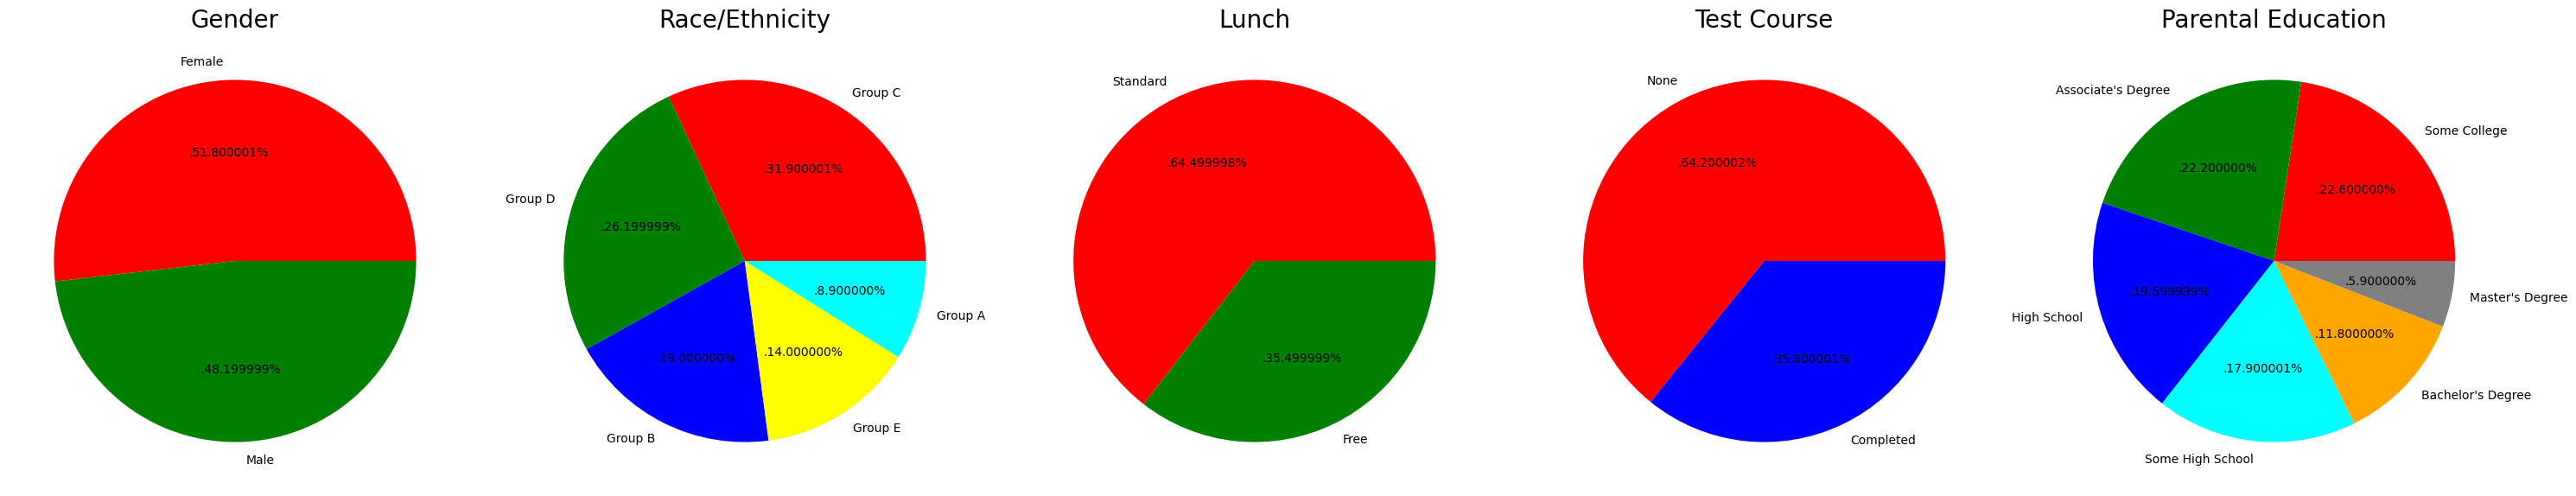

In [24]:
# Multivariate analysis using pieplot

plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'yellow', 'cyan']

plt.pie(size, colors=color, labels = labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels= 'None', 'Completed'
color= 'red', 'blue'

plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Insights
1) we can see that the number of males and females are almost same
2) Most of the students belongs to group C
3) Most of the students prefer standard lunch
4) Most of the students did not enroll in any test course
5) Most of the students parents went to attended some college followed by Associates degree

## Feature Wise Selection 
 1) how is the distribution of gender
 2) is gender has any impact on students performance

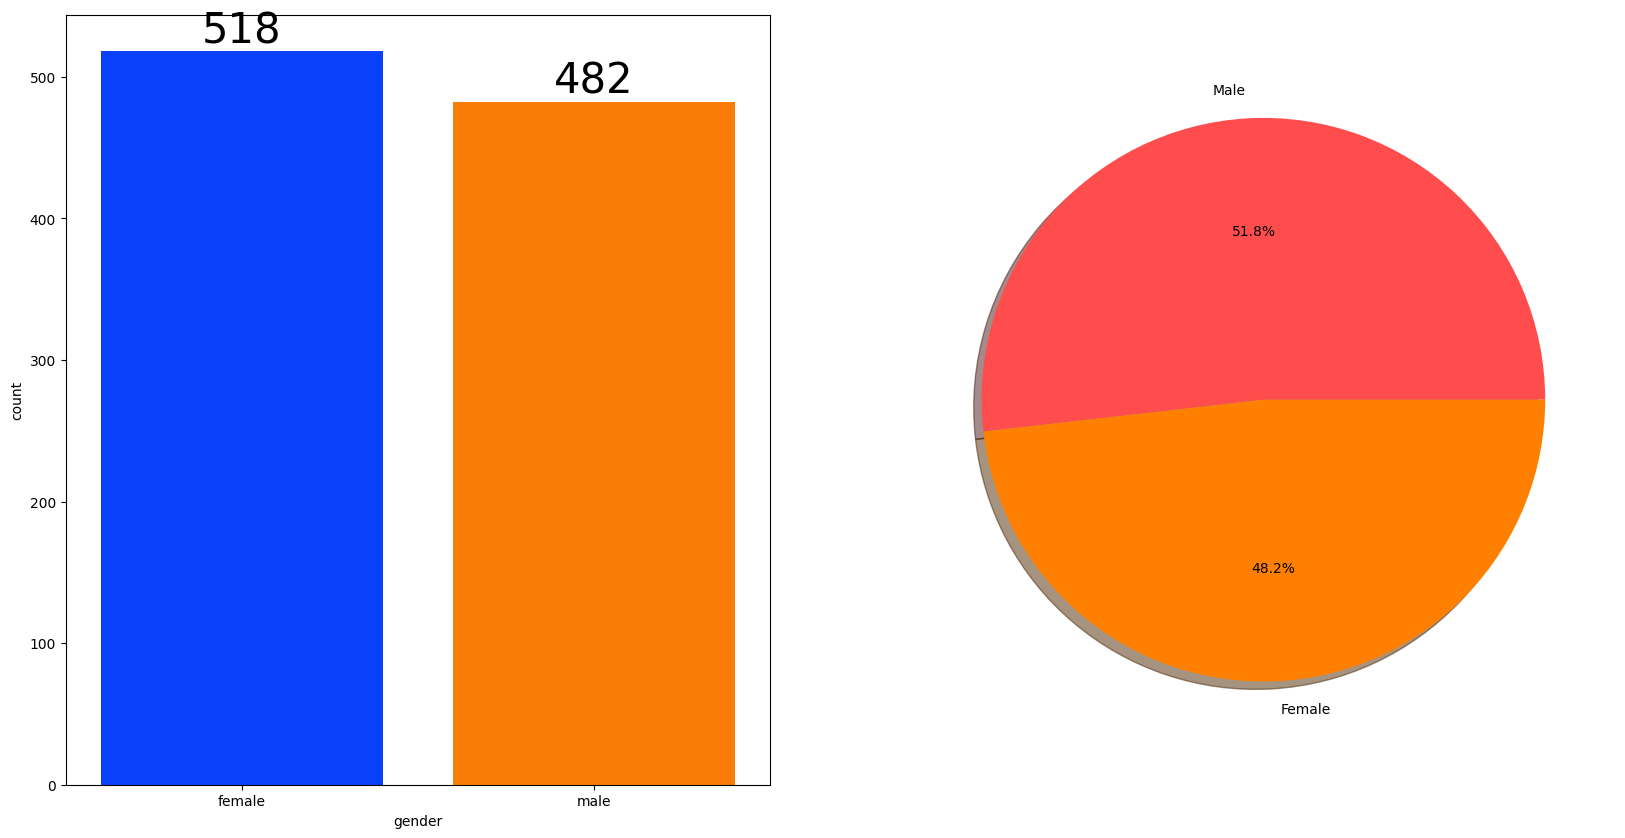

In [25]:
## Univariate analysis (How is distributio of gender)

fig, axs = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=axs[0], saturation=0.95)
for  container in axs[0].containers:
    axs[0].bar_label(container, color='black', size=30)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d', '#ff8000'])
plt.show()

### Insights
Gender has balanced data with female students (518) and male students (482)

In [28]:
## Bivariate Analysis (Does gender have any impact on students performance?)
gender_group = df.groupby('gender')
print(gender_group)

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
